# ADP
***

## 02. 통계분석

### Q1) pop_density 변수를 factor형 변수로 변환하고, 
###     pop_density별 revenues의 평균 차이가 있는지 통계분석을 시행하여 결과를 해석하시오. 
###     만일 대립가설이 채택된다면 사후분석을 실시하고 결과를 해석하시오.

In [40]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from scipy.stats import probplot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.stattools import durbin_watson # 독립성 가정 충족 여부
import statsmodels.api as sm
import time

In [2]:
df = pd.read_csv("C:/Users/ksh/Desktop/나/ADP실기/모의고사 4회/bike_marketing.csv")

In [4]:
df.head()

,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
0,1,65.66,47.86,52.46,166,39.26,5,High
1,2,39.10,55.20,77.40,172,38.90,7,Medium
2,3,174.81,52.01,68.01,295,49.51,11,Medium
3,4,34.36,61.96,86.86,183,40.56,7,High
4,5,78.21,40.91,30.41,150,40.21,9,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company_num      172 non-null    int64  
 1   google_adwords   172 non-null    float64
 2   facebook         172 non-null    float64
 3   twitter          172 non-null    float64
 4   marketing_total  172 non-null    int64  
 5   revenues         172 non-null    float64
 6   employees        172 non-null    int64  
 7   pop_density      172 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.9+ KB


In [7]:
df.pop_density = df.pop_density.astype('category')

In [13]:
model = ols('revenues ~ C(pop_density)', data = df).fit()

In [14]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(pop_density),2.0,41.731283,20.865641,0.609944,0.544573
Residual,169.0,5781.337568,34.209098,NaN,NaN


SSA의 자유도는 2(집단 수  - 1)이고 SST의 자유도는 169(관측치 수 - 집단 수)다. p-value는 0.545로 유의수준 0.05 하에서 대립가설을 기각한다. 즉 pop_density에 따라서 매출은 통계적으로 유의한 차이가 있다고 보기 어렵다.

***
### Q2) google_adwords, facebook, twitter, marketing_total, employees가 
###     revenues에 영향을 미치는지 알아보는 회귀분석을 전진선택법을 사용하여 수행하고 결과를 해석하시오.

In [16]:
X = df[['google_adwords', 'facebook', 'twitter', 'marketing_total', 'employees']]
y = df.revenues

In [17]:
X['constant'] = 1

In [30]:
add_feature = ['constant']
aic_list = []
target_cols = list(X.columns[:-1])
i = 0
while True :
    i += 1
    print(f'{i}번째 탐색')
    if i == 1 :
        before_model = sm.OLS(y, X[['constant']]).fit()
        before_aic = model.aic
        for c in target_cols :
            after_model = sm.OLS(y, X[add_feature + [c]]).fit()
            after_aic = after_model.aic
            print(f'{c} 추가 되었을 때 AIC는 {after_aic}이다.')
            aic_list.append(after_aic)
        print(f'추가될 변수는 {target_cols[np.argmin(aic_list)]}')
        add_feature.append(target_cols[np.argmin(aic_list)])
        del target_cols[np.argmin(aic_list)]
    elif i != 1 :
        a = []
        for c in target_cols :
            before_model = sm.OLS(y, X[add_feature]).fit()
            before_aic = before_model.aic
            
            after_model = sm.OLS(y, X[add_feature + [c]]).fit()
            after_aic = after_model.aic
            
            print(f'{c} 추가 전은 {before_aic}이고 {c}추가 되었을 때 AIC는 {after_aic}')
            a.append(after_aic)
        try :
            if before_aic > np.min(a):
                print(f'추가될 feature는 {target_cols[np.argmin(a)]}')
                add_feature.append(target_cols[np.argmin(a)])
                del target_cols[np.argmin(a)]
            else :
                break
        except :
            break
print('*' * 100)
print(f'최종 선택 변수들은 {add_feature}이다.')

1번째 탐색
google_adwords 추가 되었을 때 AIC는 945.7576859327252이다.
facebook 추가 되었을 때 AIC는 1028.0335856444533이다.
twitter 추가 되었을 때 AIC는 1084.9261802664207이다.
marketing_total 추가 되었을 때 AIC는 874.4011544403056이다.
employees 추가 되었을 때 AIC는 946.1149216366764이다.
추가될 변수는 marketing_total
2번째 탐색
google_adwords 추가 전은 874.4011544403056이고 google_adwords추가 되었을 때 AIC는 865.4031801350886
facebook 추가 전은 874.4011544403056이고 facebook추가 되었을 때 AIC는 789.0997049845064
twitter 추가 전은 874.4011544403056이고 twitter추가 되었을 때 AIC는 874.47679668028
employees 추가 전은 874.4011544403056이고 employees추가 되었을 때 AIC는 843.5428552566617
추가될 feature는 facebook
3번째 탐색
google_adwords 추가 전은 789.0997049845064이고 google_adwords추가 되었을 때 AIC는 765.5685347401864
twitter 추가 전은 789.0997049845064이고 twitter추가 되었을 때 AIC는 765.9212826006149
employees 추가 전은 789.0997049845064이고 employees추가 되었을 때 AIC는 772.4697651882614
추가될 feature는 google_adwords
4번째 탐색
twitter 추가 전은 765.5685347401864이고 twitter추가 되었을 때 AIC는 762.2059078234536
employees 추가 전은 765.5685347401864이고 employe

In [35]:
model = sm.OLS(y, X[add_feature]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenues   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.57e-72
Time:                        10:43:45   Log-Likelihood:                -369.26
No. Observations:                 172   AIC:                             750.5
Df Residuals:                     166   BIC:                             769.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant           28.4433      0.596     47.706      0.000      27.266      29.621
marketing_total    -1.1696      0.571     -2.049      0.042      -2.297      -0.043
facebook            1.3464      0.571      2.356      0.020       0.218       2.474
google_adwords      1.2110      0.571      2.122      0.035       0.084       2.338
employees           0.3865      0.104      3.708      0.000       0.181       0.592
twitter             1.1724      0.571      2.052      0.042       0.045       2.300
==============================================================================
Omnibus:                        3.945   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.974
Skew:                          -0.341   Prob(JB):                        0.137
Kurtosis:                       2.702   Cond. No.                     2.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

처음에 marketing_total 변수가 추가되었을 때 AIC 값이 874.4로 가장 작아지므로 다음 단계에 marketing_total 변수를 모형에 추가하였다. 다음 단계에서는 facebook 변수가 추가 되었을 때 AIC 값이 789.09로 가장 낮아지는 것을 알 수 있다.<br>
이러한 단계들을 거쳐 최종적으로 marketing_total, facebook, google_adwords, employees, twitter 변수가 선택되었다.<br>
최종 회귀식은 y = 28.443 + 1.3464 * facebook + 1.1724 * twitter + 0.3865 * employees + 1.211 * google_adwords - 1.1696 * marketing_total이며 변수선택을 하지 않았을 때와 동일한 결과를 보인다.<br>
결정계수 값은 0.873이고 수정된 결정계수는 0.870이다. 또한 모든 변수들의 p-value가 유의수준 0.05보다 작기 때문에 통계적으로 모두 유의하다고 볼 수 있다.<br>
모델의 통계적유의성을 띄는 F통계량이 매우 크며 p-value도 0에 수렴하기 때문에 통계적으로 유의한 모델이라고 볼 수 있다.
***
### Q3) 전진선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 
###     잔차분석을 수행하고 결과를 해석하시오. 

In [58]:
durbin_watson(model.resid)

2.1113783728608317

더빈 왓슨 검정 결과 값이 2.114로 2에 가깝기 때문에 독립성 가정을 만족한다고 볼 수 있다.

In [61]:
shapiro = stats.shapiro(model.resid)
print(f'shapiro 검정결과 검정 값은 {np.round(shapiro[0],4)}이고 p-value는 {np.round(shapiro[1], 4)}이다.')

shapiro 검정결과 검정 값은 0.9866이고 p-value는 0.0991이다.


검정 결과 p-value가 0.0991로 유의수준 0.05하에서 대립가설을 기각한다. 따라서 데이터는 정규분포를 따른다고 볼 수 있다.

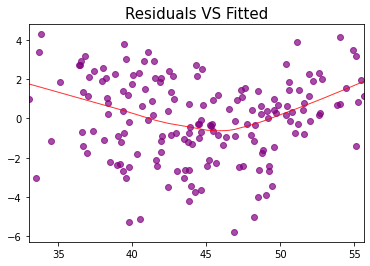

In [83]:
plt.scatter(model.fittedvalues, model.resid, color = 'purple', alpha = .7)
sns.regplot(model.fittedvalues, model.resid,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.title('Residuals VS Fitted', size = 15)
plt.show()

잔차가 평균인 0을 중심으로 고르게 퍼져있는 것을 알 수 있지만 포물선을 그리고 있기 때문에 등분산성을 만족한다고 보기 어렵다.

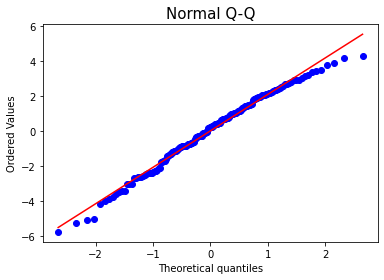

In [54]:
probplot(model.resid, plot = plt)
plt.title('Normal Q-Q', size = 15)
plt.show()

정규성을 만족한다고 볼 수 있다.

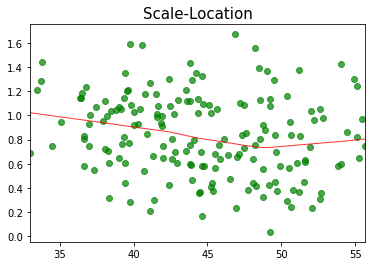

In [81]:
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.get_influence().resid_studentized_internal)), color = 'green', alpha = .7)
sns.regplot(model.fittedvalues, np.sqrt(np.abs(model.get_influence().resid_studentized_internal)),
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.title('Scale-Location', size = 15)
plt.show()

기울기가 변화하는 경향이 보이고 빨간 선에서 멀리 떨어진 점들이 존재해 이상치인 점이 있을 가능성이 있다고 볼 수 있다.

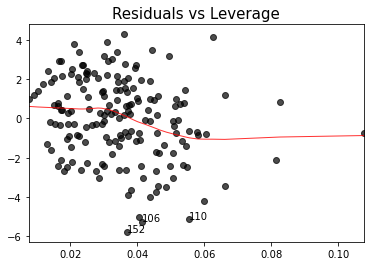

In [80]:
plt.scatter(model.get_influence().hat_matrix_diag, model.resid, color = 'black', alpha = .7)
sns.regplot(model.get_influence().hat_matrix_diag, model.resid,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
leverage_top_3 = np.flip(np.argsort(model.get_influence().cooks_distance[0]), 0)[:3]
for i in leverage_top_3:
    plt.annotate(i, xy=(model.get_influence().hat_matrix_diag[i],
                                 model.resid[i]));
plt.title('Residuals vs Leverage', size = 15)
plt.show()

쿡의 거리 0.5 이상인 점들이 존재하지 않기 때문에 회귀 직선에 영향을 끼치는 이상치들은 없다고 볼 수 있다.

***

종합적으로 볼 때 독립성과 정규성은 만족하지만 등분산성은 만족한다고 볼 수 없기 때문에 모형을 활용할 수는 없다.